Kuster and Toksöz

In [1]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use(['science', 'notebook', 'grid'])

In [2]:
ks = 37e9
ki = 2.2e9
mus =44e9
mui = 0
rhom = 2.65e3 
rhof = 1e3 
alfa = 2e-1
decision=2
Bs=(mus*(3*ks+mus)/(3*ks+4*mus))/1e9
Zs=((mus/6)*((9*ks+8*mus)/(ks+2*mus)))/1e9
if decision==1:
    #spheres
    Psi=(ks+4*mus/3)/(ki+4*mus/3)
    Qsi=(mus/1e9+Zs)/Zs
elif decision==2:
    #penny shaped
    Psi=(ks/1e9)/(ki/1e9+np.pi*alfa*Bs)
    Qsi=(1+8*(mus/1e9)/(np.pi*alfa*(mus/1e9+2*Bs))+2*(ki/1e9+(2/3)*mus/1e9)/(ki/1e9+np.pi*alfa*Bs))/5

In [3]:
phi=np.zeros([51])
Vp=np.zeros([51])
Vs=np.zeros([51])

for b in range(0,51): #el 51 viene de las variables de arriba phi, Vp, Vs
    phi[b]=b/100
    kkt=(ks+phi[b]*Psi*(4/3)*mus*(ki-ks)/(ks+(4/3)*mus))/(1-phi[b]*Psi*(ki-ks)/(ks+(4/3)*mus))
    mukt=mus*(1-phi[b]*Qsi*Zs/(mus/1e9+Zs))/(1+phi[b]*Qsi*(mus/1e9)/((mus/1e9)+Zs))
    rhobulk=(1-phi[b])*rhom+phi[b]*rhof
    Vp[b]=((3*kkt+4*mukt)/(3*rhobulk))**0.5
    Vs[b]=(mukt/rhobulk)**0.5

Text(0.5, 1.0, 'Modelo Kuster and Toksöz')

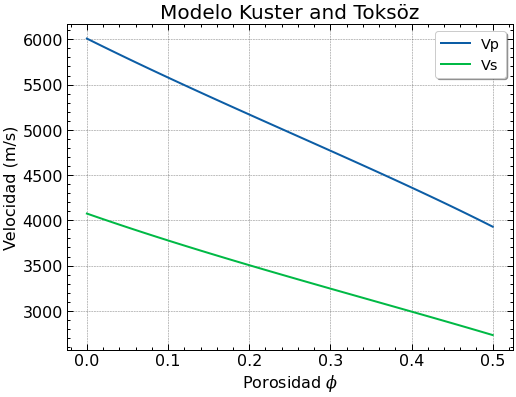

In [4]:
fig, ax = plt.subplots()
ax.plot(phi,Vp,label='Vp')
ax.plot(phi,Vs,label='Vs')
legend = ax.legend(loc='upper right', shadow=True, fontsize='x-large')

plt.xlabel("Porosidad $\it{\phi}$")
plt.ylabel("Velocidad (m/s)")
plt.title('Modelo Kuster and Toksöz', fontsize=20)